In [1]:
import pandas as pd
import re
import numpy as np

In [2]:
txt = pd.read_csv("eng_corp.csv")
txt

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
...,...,...,...,...,...,...,...,...,...,...
49995,53287,73465,"Rex Tillerson Says Climate Change Is Real, but …",Atlantic,Robinson Meyer,2017-01-11,2017.0,1.0,NaN,"As chairman and CEO of ExxonMobil, Rex Tillers..."
49996,53288,73466,The Biggest Intelligence Questions Raised by t...,Atlantic,Amy Zegart,2017-01-11,2017.0,1.0,NaN,I’ve spent nearly 20 years looking at intellig...
49997,53289,73467,Trump Announces Plan That Does Little to Resol...,Atlantic,Jeremy Venook,2017-01-11,2017.0,1.0,NaN,Donald Trump will not be taking necessary st...
49998,53290,73468,Dozens of For-Profit Colleges Could Soon Close,Atlantic,Emily DeRuy,2017-01-11,2017.0,1.0,NaN,Dozens of colleges could be forced to close ...


In [3]:
#抽取cnn title, content
cnn = txt[txt['publication'].str.contains("CNN")]
cnn = cnn[['title','content']]
cnn
no_cnn = []
for i in cnn['content']:
    no_cnn.append(i.replace('(CNN)','').replace('Washington','').replace('Houston',''))
no_cnn
cnn['content'] = no_cnn


# 主題分析

In [4]:
from nltk.tokenize import WordPunctTokenizer
import nltk
from nltk.corpus import stopwords  
stop_words = set(stopwords.words('english'))
import string  
punt = []
for i in string.punctuation:
    punt.append(i)
topic = cnn['title']
topic = topic[~topic.str.contains('Fast Facts') & ~topic.str.contains('CNN 10')& ~topic.str.contains('CNN Student')]
len(topic)

11124

In [5]:
#POS
topic1 = []
for i in topic:
    topic1.append(nltk.word_tokenize(i))
topic2 = []
for i in topic1:
    topic2.append(nltk.pos_tag(i,tagset='universal'))

In [6]:
#Count POS
stopword = ['’','s','“','”']
pos1 = {}
for i in topic2:
    for j in i:
        if j[1] != "." and j[1] != "X" and j[0] not in stopword:
            pos1[j[1]] = pos1.get(j[1],0) + 1
                        
df1 = pd.DataFrame.from_dict(pos1,  orient='index', columns=['count'])
df1 = df1.sort_values(by='count',ascending=False)
df1["mean"] = round(df1['count']/df1['count'].sum(),2)
df1

,count,mean
NOUN,46441,0.53
VERB,13480,0.15
ADP,9020,0.10
ADJ,6643,0.08
DET,3063,0.03
PRT,2484,0.03
ADV,2270,0.03
PRON,2227,0.03
NUM,1894,0.02
CONJ,713,0.01


In [7]:
#gerund
notGerund = ['everything', 'nothing', 'something', 'beijing']
gerundCount = 0
gerund = []
for i in topic2:
    for j in i:
        if j[1] == 'NOUN' and j[0].endswith('ing') and j[0].lower() not in notGerund:
            gerundCount += 1
            gerund.append(j[0])
print(gerundCount)
gerund

630


['hacking',
 'warning',
 'King',
 'hacking',
 'meeting',
 'meaning',
 'shooting',
 'Horrifying',
 'funding',
 'meddling',
 'clowning',
 'thing',
 'painting',
 'King',
 'hearing',
 'Ringling',
 'closing',
 'landing',
 'Stirling',
 'shooting',
 'living',
 'hearing',
 'kidnapping',
 'Manning',
 'Manning',
 'drilling',
 'funding',
 'King',
 'ramming',
 'hearing',
 'morning',
 'meaning',
 'marching',
 'posturing',
 'meeting',
 'lynching',
 'meeting',
 'lobbying',
 'misleading',
 'Opening',
 'shooting',
 'conditioning',
 'sighting',
 'basking',
 'papering',
 'ruling',
 'ruling',
 'dripping',
 'meeting',
 'hearing',
 'meeting',
 'lobbying',
 'closing',
 'clothing',
 'Missing',
 'thinking',
 'Walking',
 'coalition-building',
 'soliciting',
 'handling',
 'warning',
 'briefing',
 'mainstreaming',
 'anything',
 'shooting',
 'opening',
 'trafficking',
 'flooding',
 'speaking',
 'discouraging',
 'shooting',
 'spending',
 'shooting',
 'driving',
 'feeling',
 'killing',
 'describing',
 'anything',
 '

In [8]:
topw = {}
for i in topic2:
    for j in i:
        if j[1] != "." and j[1] != "X" and j[0] not in stopword:
            topw[j[0]] = topw.get(j[0],0) + 1
topw = pd.DataFrame.from_dict(topw, orient='index', columns=['count'])
topw = topw.sort_values(by=['count'],ascending=False)
topw['mean'] = topw['count']/topw['count'].sum()
topw.head(10)

,count,mean
to,2092,0.023709
in,1905,0.021590
Trump,1744,0.019765
of,1323,0.014994
the,1126,0.012761
for,968,0.010971
on,948,0.010744
a,673,0.007627
and,534,0.006052
at,516,0.005848


In [9]:
#Total noun
noun = []
verb = []
for i in topic2:
    for j in i:
        if j[1] == 'NOUN':
            noun.append(j[0])
        if j[1] == 'VERB':
            verb.append(j[0])
print("Total noun:",len(noun))

Total noun: 51101


In [10]:
#Verb details
totv = len(verb)
print('Total verb:',totv)
ing = []
ed = []
for i in verb:
    ing.append(i.endswith('ing'))
    ed.append(i.endswith('ed'))
print('ing:',ing.count(True)/totv)
print('ed:',ed.count(True)/totv)
print('be',(verb.count('be')+(verb.count('is'))+verb.count('was')+verb.count('are')+verb.count('were'))/totv)

being = []
for i in topic2:
    for j in range(0, len(i)):
        if i[j][0][0].isupper() and i[j][0].endswith('ing'):
            continue
        elif i[j][0].endswith('ing') and i[j-1][1] == 'VERB':
            being.append(i[j])
print('Gerund Total:',ing.count(True)-len(being))

Total verb: 15421
ing: 0.11283314960119317
ed: 0.14674794111925296
be 0.061863692367550745
Gerund Total: 1333


In [11]:
#start word
start = []
start_pos = {}
for i in topic2:
    start.append(i[0])
for i in start:
    start_pos[i[1]] = start_pos.get(i[1],0) + 1
start_pos = pd.DataFrame.from_dict(start_pos,  orient='index', columns=['count'])
start_pos["mean"] = start_pos['count']/start_pos['count'].sum()
start_pos

,count,mean
NOUN,7634,0.686264
NUM,335,0.030115
ADJ,1100,0.098885
ADV,530,0.047645
DET,495,0.044498
VERB,460,0.041352
ADP,239,0.021485
PRON,296,0.026609
CONJ,7,0.000629
.,21,0.001888


In [52]:
#Verbs in sentences
verb_w = []
for i in topic2:
    for j in i:
        if j[1] == 'VERB':
            verb_w.append(j[0])
verb_w2 = []
for i in verb_w:
    if i in verb_w2:
        continue
    else:
        verb_w2.append(i)

In [13]:
noVerb = []
hasVerb = []

for i in topic:
    pos = nltk.pos_tag(nltk.word_tokenize(i.lower()),tagset='universal')
    verb = 0
    poshas = []
    posno = []
    for j in pos:
        if j[1] == 'VERB':
            verb += 1
    if verb == 0:
        noVerb.append(i)
    else:
        hasVerb.append(i)


In [53]:
#Phrase before the first verb
top_count = []
start_sen = []
for i in topic:
    sen = i.split()
    top_count.append(len(sen))
    for j in sen:
        if j in verb_w2:
            pos = i.find(j)
            if pos != -1 or len(i[0:pos]) != 0:
                    start_sen.append(i[0:pos])
                    break
            
start_count = []
for i in start_sen:
    split = i.split()
    start_count.append(len(split))
print("proportion to topic:",len(start_sen)/len(topic))

proportion to topic: 0.9223300970873787


In [55]:
#topics with verb
#word count
v_count = []
for i in hasVerb:
    sent = i.split()
    v_count.append(len(sent))

In [54]:
#topics with no verb
noV_count = []
for i in noVerb:
    sent = i.split()
    noV_count.append(len(sent))

In [17]:
#Stat for phrase before the first verb
start_count = pd.DataFrame(start_count)
start_count.describe()

,0
count,10260.000000
mean,2.227583
std,1.787459
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,16.000000


In [18]:
#Stat for sentences
top_count = pd.DataFrame(top_count)
top_count.describe()

,0
count,11124.000000
mean,7.892844
std,2.055734
min,2.000000
25%,7.000000
50%,8.000000
75%,9.000000
max,22.000000


In [19]:
#number of sentence without verb
(len(top_count)-len(start_count))/len(top_count)

0.07766990291262135

# 有動詞/無動詞主題分析

In [20]:
#stat for no verb topic
noV_countDF = pd.DataFrame(noV_count)
noV_countDF.describe()

,0
count,1886.000000
mean,7.019088
std,1.828062
min,2.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,14.000000


In [21]:
#stat for verb-topic
V_countDF = pd.DataFrame(v_count)
V_countDF.describe()

,0
count,9238.000000
mean,8.071228
std,2.054079
min,2.000000
25%,7.000000
50%,8.000000
75%,9.000000
max,22.000000


No-verb topics skew 0.15
Has-verb topics skew 0.76


Text(0.5, 1.0, 'Word count distribution')

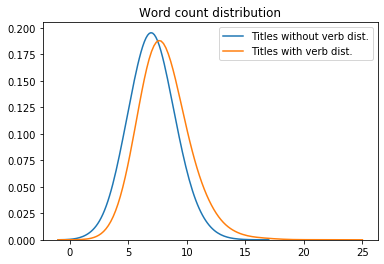

In [22]:
#no-verb/has-verb topics distribution details
nov_skew = pd.Series(noV_count)
print("No-verb topics skew", round(nov_skew.skew(),2))

hasv_skew = pd.Series(v_count)
print("Has-verb topics skew", round(hasv_skew.skew(),2))


import seaborn as sns
from matplotlib import pyplot as plt 
sns.kdeplot(noV_countDF[0],bw=1, label='Titles without verb dist.')
sns.kdeplot(V_countDF[0],bw=1, label='Titles with verb dist.')
plt.title('Word count distribution')


In [23]:
def pos(sen, topicA, topicB):
    topic1 = []
    for i in sen:
        topic1.append(nltk.word_tokenize(i))
        
    for j in topic1:
        topic_clean = []
        pos = nltk.pos_tag(j,tagset='universal')
        for c in pos:
            if c[1] != '.' and c[0] != '’' and c[1] != 'X':
                topic_clean.append(c)
        topicA.append(topic_clean)
    
    for k in topicA:
        for n in k:
            if n[1] != '.' and n[0] != '’':
                topicB.append(n)

In [24]:
#pos
nv_pos_e = []
nv_pos_a = []
pos(noVerb,nv_pos_e,nv_pos_a)
hasv_pos_e = []
hasv_pos_a = []
pos(hasVerb,hasv_pos_e,hasv_pos_a)

In [25]:
#count no-verb topics
'''
Tag	Meaning	English Examples
ADJ	adjective	new, good, high, special, big, local
ADP	adposition	on, of, at, with, by, into, under
ADV	adverb	really, already, still, early, now
CONJ	conjunction	and, or, but, if, while, although
DET	determiner, article	the, a, some, most, every, no, which
NOUN	noun	year, home, costs, time, Africa
NUM	numeral	twenty-four, fourth, 1991, 14:24
PRT	particle	at, on, out, over per, that, up, with
PRON	pronoun	he, their, her, its, my, I, us
VERB	verb	is, say, told, given, playing, would
.	punctuation marks	. , ; !
X	other	ersatz, esprit, dunno, gr8, univeristy
'''

nov = {}
for i in nv_pos_a:
    nov[i[1]] = nov.get(i[1],0) + 1
novDF = pd.DataFrame.from_dict(nov,  orient='index', columns=['count'])
novDF = novDF.sort_values(by='count',ascending=False)
novDF["mean"] = round(novDF['count']/novDF['count'].sum(),2)
novDF

,count,mean
NOUN,8289,0.61
ADP,1827,0.14
ADJ,1353,0.10
DET,619,0.05
NUM,416,0.03
VERB,381,0.03
ADV,239,0.02
CONJ,168,0.01
PRON,103,0.01
PRT,91,0.01


In [26]:
#count has-verb topics
hasv = {}
for i in hasv_pos_a:
    hasv[i[1]] = hasv.get(i[1],0) + 1
hasvDF = pd.DataFrame.from_dict(hasv,  orient='index', columns=['count'])
hasvDF = hasvDF.sort_values(by='count',ascending=False)
hasvDF["mean"] = round(hasvDF['count']/hasvDF['count'].sum(),2)
hasvDF

,count,mean
NOUN,38593,0.50
VERB,14213,0.19
ADP,7193,0.09
ADJ,5550,0.07
DET,2449,0.03
PRT,2419,0.03
PRON,2135,0.03
ADV,2053,0.03
NUM,1478,0.02
CONJ,546,0.01


In [27]:
#no-verb topics analysis
lst = []
for i in range(2,15):
    length = {}
    for j in nv_pos_e:
        if len(j) == i:
            for k in j:
                length[k[1]] = length.get(k[1],0) + 1
    lst.append(length)
    
nv_each = pd.DataFrame(lst)
nv_each.index = np.arange(2, 15)

nv_each['noun'] = round(nv_each['NOUN']/nv_each.sum(axis=1),2)
nv_each['adj'] = round(nv_each['ADJ'].fillna(0)/nv_each.sum(axis=1),2)
nv_each['prep'] = round((nv_each['ADP'].fillna(0)+nv_each.fillna(0)['PRT'])/nv_each.sum(axis=1),2)
nv_each['det'] = round(nv_each['DET'].fillna(0)/nv_each.sum(axis=1),2)
nv_each = nv_each[['NOUN','DET','noun','adj','prep','det']]
nv_each = nv_each.reset_index()
nv_each

,index,NOUN,DET,noun,adj,prep,det
0,2,20,NaN,0.83,0.12,0.04,0.00
1,3,46,2.0,0.67,0.16,0.09,0.03
2,4,244,20.0,0.66,0.08,0.10,0.05
3,5,694,70.0,0.64,0.11,0.10,0.06
4,6,1285,88.0,0.65,0.10,0.12,0.04
5,7,1936,145.0,0.62,0.10,0.14,0.05
6,8,1723,125.0,0.61,0.10,0.15,0.04
7,9,1184,76.0,0.59,0.10,0.17,0.04
8,10,727,46.0,0.59,0.09,0.18,0.04
9,11,275,29.0,0.54,0.11,0.17,0.06


In [28]:
#has-verb topics analysis
lst2 = []
for i in range(2,23):
    length = {}
    for j in hasv_pos_e:
        if len(j) == i:
            for k in j:
                length[k[1]] = length.get(k[1],0) + 1
    lst2.append(length)
    
hasv_each = pd.DataFrame(lst2)
hasv_each.index = np.arange(2, 23)

hasv_each['noun'] = round(hasv_each['NOUN']/hasv_each.sum(axis=1),2)
hasv_each['verb'] = round(hasv_each['VERB'].fillna(0)/hasv_each.sum(axis=1),2)
hasv_each['adj'] = round(hasv_each['ADJ'].fillna(0)/hasv_each.sum(axis=1),2)
hasv_each['prep'] = round((hasv_each['ADP'].fillna(0)+hasv_each['PRT']).fillna(0)/hasv_each.sum(axis=1),2)
hasv_each['det'] = round(hasv_each['DET'].fillna(0)/hasv_each.sum(axis=1),2)
hasv_each = hasv_each[['NOUN','DET','noun','verb','adj','prep','det']]
hasv_each = hasv_each.reset_index()
hasv_each

,index,NOUN,DET,noun,verb,adj,prep,det
0,2,3,NaN,0.75,0.21,0.00,0.00,0.00
1,3,29,NaN,0.46,0.35,0.08,0.03,0.00
2,4,250,13.0,0.51,0.25,0.06,0.05,0.03
3,5,1310,67.0,0.57,0.21,0.08,0.06,0.03
4,6,3697,171.0,0.54,0.20,0.08,0.09,0.03
5,7,6556,333.0,0.53,0.19,0.07,0.11,0.03
6,8,8132,396.0,0.52,0.18,0.08,0.12,0.03
7,9,6857,407.0,0.50,0.18,0.07,0.14,0.03
8,10,4995,379.0,0.49,0.18,0.07,0.14,0.04
9,11,2936,238.0,0.46,0.19,0.07,0.14,0.04


In [29]:
#check the topics with n words
def check(topic, word):
    if topic == noVerb:
        print(nv_each.iloc[word-2],'\n')
    else:
        print(hasv_each.iloc[word-2],'\n')
        
    for i in topic:
        a = i.split()
        if len(a) == word:
            print(i)

In [51]:
#noVerb: 2-14, hasVerb: 2-22
check(noVerb,4)

index      4.00
NOUN     244.00
DET       20.00
noun       0.66
adj        0.08
prep       0.10
det        0.05
Name: 2, dtype: float64 

Timeline: Turkey’s bloody year
A clash of identities
Anatomy of Senate confirmations
Japanese mini-rocket launch fails
Jimmy ’Superfly’ Snuka dies
Trump inauguration: key moments
Inauguration in 140 characters 
Trump Policy: Day 5
Why Donald Trump lies 
Books of the Week
Donald Trump’s alternate universe
Donald Trump’s Asia pivot
Trump watch: Live coverage
Oscars: The winners list 
Oscars 2017: Live coverage
Navy secretary nominee withdraws
Hollywood mobilizes against Trump
Trump’s baseless wiretap claim
British Parliament backs Brexit 
Northeast braces for blizzard
NBA playoffs: Cavs-Warriors III?
Trump’s 100-day score card
French election: Live updates 
The little boy president
North Korea launches missile
Manchester bombing: Live updates
Trump pushes around NATO
London attack: Live updates
Melania Trump moves in
Georgia special election: Highlight

In [31]:
#find start word
def start(x,y):
    for i in x:
        if i.startswith(y):
            print(i)

In [32]:
start(topic,'New')

New year celebrations ring in 2017
New UN secretary-general starts work
New York City has safest year
Newborn abducted from hospital found alive 18 years later, sheriff says
New cervical cancer research is personal 
New Jersey gives out free baby boxes
New York police charge man in jogger’s death
New York, Boston close schools ahead of snowstorm 
New Yorkers rally to say ’Today I am a Muslim, too’
New Trump travel ban order nearing completion
New threats to US Jewish centers 
New York gallery owner denied entry to US
Newly arrived Afghan family freed after 4 days
New Orleans can remove Confederate monuments, federal court rules
New York EMT killed: Man charged with murder
New Jersey teen gets accepted by all 8 Ivy League schools
New York judge’s death a possible suicide,  law enforcement sources say
New law will restrict women’s access to health care, experts fear
New Orleans begins controversial removal of Confederate monuments
New US embassy designs make a bold statement
New details 

In [33]:
#find titles contain assigned words
def word(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_colwidth',None)
    print(topic[topic.str.contains(x)])

In [34]:
word('making')

34070                                      The makings of the ’world’s best race horse’
34210                   The White House’s decision-making on Michael Flynn is troubling
34576                               Is Roger Stone making good on a 40-year-old grudge?
34617                            No one knows if Trump is making White House recordings
35114                            French Open: Ons Jabeur making history for Arab women 
35222                                      Trump is making Theresa May’s life miserable
36285                                         Ginsburg: ’I regret making’ Trump remarks
37922                      ’The Magnificent Seven’ misfires in remaking classic western
39438                                                       ’Mummers’ making a comeback
39929                                AQAP: Charlie Hebdo attack was years in the making
40424                                      Road rage:  Cameras and guns making it worse
41172              Secret Servic

# Title plots

In [35]:
import seaborn as sns
from matplotlib.ticker import MaxNLocator

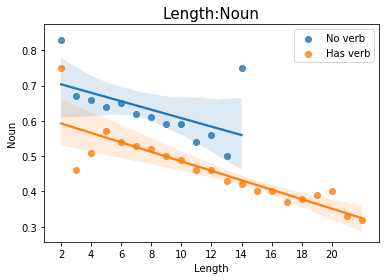

In [36]:
#length:noun
sns.regplot(x='index', y='noun',data=nv_each,label='No verb')
sns.regplot(x='index', y='noun',data=hasv_each,label='Has verb')
plt.xlabel("Length")
plt.ylabel("Noun")
plt.title('Length:Noun',size=15)
plt.xticks(range(2,22,2))
plt.legend()

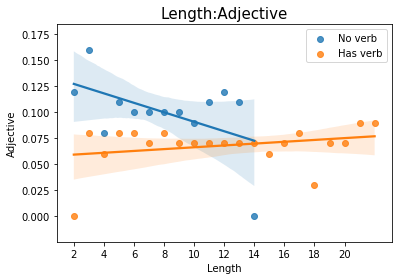

In [37]:
#length:adjective
sns.regplot(x='index', y='adj',data=nv_each,label='No verb')
sns.regplot(x='index', y='adj',data=hasv_each,label='Has verb')
plt.xlabel("Length")
plt.ylabel("Adjective")
plt.title('Length:Adjective',size=15)
plt.xticks(range(2,22,2))
plt.legend()

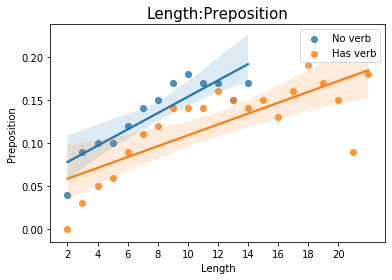

In [38]:
#length:preposition
sns.regplot(x='index', y='prep',data=nv_each,label='No verb')
sns.regplot(x='index', y='prep',data=hasv_each,label='Has verb')
plt.xlabel("Length")
plt.ylabel("Preposition")
plt.title('Length:Preposition',size=15)
plt.xticks(range(2,22,2))
plt.legend()

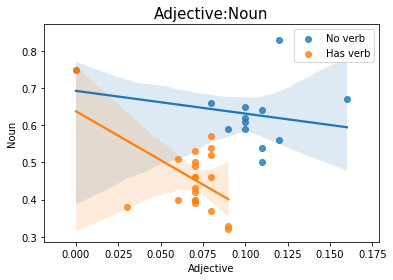

In [39]:
#noun:adj
sns.regplot(x='adj', y='noun',data=nv_each,label='No verb')
sns.regplot(x='adj', y='noun',data=hasv_each,label='Has verb')
plt.xlabel("Adjective")
plt.ylabel("Noun")
plt.title('Adjective:Noun',size=15)
plt.legend()

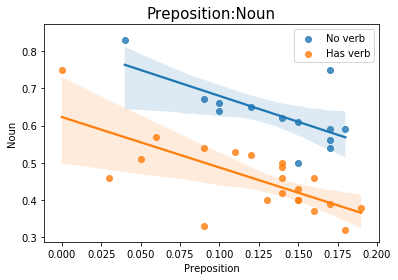

In [40]:
#noun:prep
sns.regplot(x='prep', y='noun',data=nv_each,label='No verb')
sns.regplot(x='prep', y='noun',data=hasv_each,label='Has verb')
plt.xlabel("Preposition")
plt.ylabel("Noun")
plt.title('Preposition:Noun',size=15)
plt.legend()

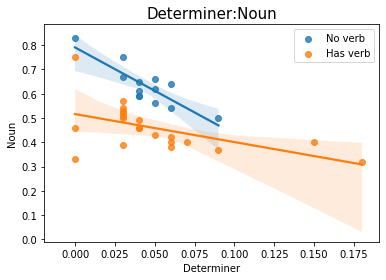

In [41]:
#noun:det
sns.regplot(x='det', y='noun',data=nv_each,label='No verb')
sns.regplot(x='det', y='noun',data=hasv_each,label='Has verb')
plt.xlabel("Determiner")
plt.ylabel("Noun")
plt.title('Determiner:Noun',size=15)
plt.legend()

# 情態分析

In [42]:
from textblob import TextBlob

In [43]:
#has-verb titles sentiment
nov_sen = []
for i in noVerb:
    blob = TextBlob(i)
    sen = blob.sentences[0].sentiment
    count = i.split()
    if sen[0] != 0:
        nov_sen.append([i, len(count), round(sen[0],2)])
    

#no-verb titles sentiment
hasv_sen = []
for i in hasVerb:
    blob = TextBlob(i)
    sen = blob.sentences[0].sentiment
    count = i.split()
    if sen[0] != 0:
        hasv_sen.append([i, len(count), round(sen[0],2)])

In [44]:
#sentiment check

def senti(x, y, z=-1):
    for i in x:
        if i[1] == y and i[2] >= z:
            print(i[0],i[2])

In [45]:
senti(nov_sen,4)

Timeline: Turkey’s bloody year -0.8
Japanese mini-rocket launch fails -0.25
Trump watch: Live coverage 0.14
Oscars 2017: Live coverage 0.14
French election: Live updates  0.07
The little boy president -0.19
Manchester bombing: Live updates 0.14
London attack: Live updates 0.14
Georgia special election: Highlights 0.36
UK referendum: Latest updates 0.5
From Russia with hate -0.8
Why plagiarism really matters 0.2
Famous ’Shawshank’ oak falls 0.5
The worst election ever -1.0
Donald Trump quintuples down -0.16
Hurricane Matthew: Live updates 0.14
London’s secret underground railway -0.4
Anti-Muslim rally inspires good 0.7
Behind the luchador mask -0.4
New York prison escape 0.14


# 名詞短語分析

In [46]:
from textblob.np_extractors import ConllExtractor
extractor = ConllExtractor()

In [47]:
nounp = []
for i in topic:
    blob = TextBlob(i, np_extractor=extractor)
    nph = blob.noun_phrases
    for j in nph:
        nounp.append(j)

In [48]:
#np check
def npcheck(n):
    for i in nounp:
        count = i.split()
        if len(count) == n:
            print(i)

In [57]:
npcheck(4)

new year celebrations ring
texas plane crash collision
trump ditches press pool
lake erie plane crash
beatles ’ first manager
trump made hatred profitable
colorful new year ’
north korea nuke threat
trump derides intel briefing
knife attacks chinese kindergarten
’ crappy ’ defeat
arrests end naacp sit-in
jeff sessions ’ office
hardest new year ’
mariah carey breaks silence
sessions ’ ag confirmation
’ defense lawyer ’
lake erie plane crash
ft. lauderdale shooting witness
romney backs trump ’
’ stupid ’ people
ted ’ shred ’
meryl streep attacks trump
golden globes acceptance speech
’ different country ’
’ tree man ’
emotional ’ final days
’ arrested development ’
biden awarded presidential medal
ending ’ wet foot
dry foot ’ policy
south china sea showdown
bush daughters offer advice
coretta scott king ’
isis leader ’ moves
fbi director comey ’
democrats aren ’ t
racing legend stirling moss
’ obsolete ’ blast
’ biggest problem ’
reigning champion ivory coast
world champion chicago cubs
$

In [59]:
nltk.pos_tag(nltk.word_tokenize('new Shanghainese go down in history'),tagset='universal')

[('new', 'ADJ'),
 ('Shanghainese', 'NOUN'),
 ('go', 'VERB'),
 ('down', 'PRT'),
 ('in', 'ADP'),
 ('history', 'NOUN')]